In [65]:
import pandas as pd

In [66]:
df = pd.read_excel('../data/review/Alfa - 300.xlsx')

In [67]:
df['equal'] = df['Jose_Angelo'] - df['Jose_Angelo2']

In [68]:
df['equal'].value_counts()

equal
0.0    286
Name: count, dtype: int64

In [69]:
df

,index,text,Jose_Angelo,Modelo,Jose_Angelo2,Modelo2,equal
0,725,tratamiento económico,7,7,7.0,7.0,0.0
1,813,aprendizaje de nuevas habilidades,4,10,4.0,NaN,0.0
2,1467,alivio del dolor postural,4,4,4.0,4.0,0.0
3,1470,resultados excelentes,4,4,4.0,4.0,0.0
4,52,curación del mal de ojo,1,1,1.0,1.0,0.0
...,...,...,...,...,...,...,...
295,197,relajación del cuerpo,4,4,4.0,4.0,0.0
296,1431,similitud con curandería,1,1,1.0,1.0,0.0
297,82,costo bajo,7,7,7.0,7.0,0.0
298,1421,credibilidad del personal,8,8,8.0,8.0,0.0


In [70]:
df['Jose_Angelo'].value_counts()

Jose_Angelo
4     140
1      34
5      29
8      22
7      16
6      14
10     14
3      12
9      11
2       8
Name: count, dtype: int64

In [71]:
df['Modelo'].value_counts()

Modelo
4     121
1      48
10     37
5      21
3      17
7      15
6      14
9      10
2      10
8       7
Name: count, dtype: int64

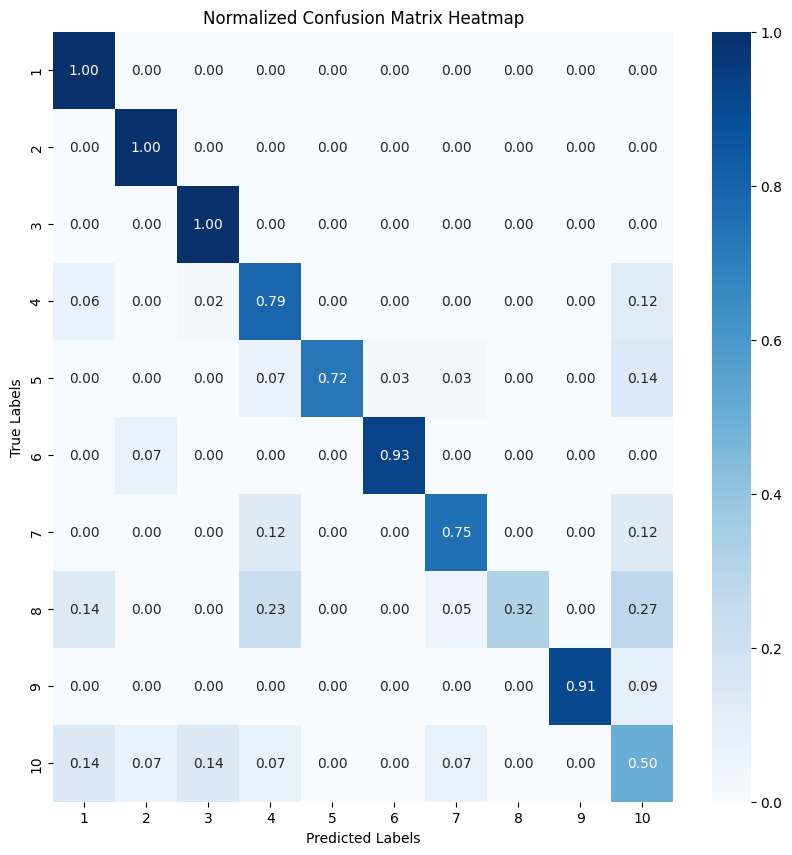

Macro F1 Score: 0.7649
Krippendorff's Alpha: 0.6138


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
import krippendorff

# Assume df has two columns: 'Jose_Angelo' (true labels) and 'Modelo' (predicted labels)

# Get sorted unique labels across both columns
labels = sorted(set(df['Jose_Angelo'].unique()) | set(df['Modelo'].unique()))

# Compute the confusion matrix
conf_matrix = confusion_matrix(df['Jose_Angelo'], df['Modelo'], labels=labels)

# Normalize the confusion matrix (row-wise)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix Heatmap')
plt.show()

# Compute macro F1 score
f1 = f1_score(df['Jose_Angelo'], df['Modelo'], labels=labels, average='macro')
print(f"Macro F1 Score: {f1:.4f}")

# Prepare data for Krippendorff's alpha: a list of raters per item
# Needs to be shaped as [rater1, rater2, ...] x items (i.e. rows are raters, columns are items)
alpha_data = [df['Jose_Angelo'].tolist(), df['Modelo'].tolist()]
alpha = krippendorff.alpha(reliability_data=alpha_data)

print(f"Krippendorff's Alpha: {alpha:.4f}")


In [73]:
from sklearn.metrics import classification_report

# Print the full classification report
report = classification_report(df['Jose_Angelo'], df['Modelo'], labels=labels)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        34
           2       0.80      1.00      0.89         8
           3       0.71      1.00      0.83        12
           4       0.92      0.79      0.85       140
           5       1.00      0.72      0.84        29
           6       0.93      0.93      0.93        14
           7       0.80      0.75      0.77        16
           8       1.00      0.32      0.48        22
           9       1.00      0.91      0.95        11
          10       0.19      0.50      0.27        14

    accuracy                           0.78       300
   macro avg       0.80      0.79      0.76       300
weighted avg       0.86      0.78      0.80       300



In [74]:
len(df.query('Modelo == 10')) / len(df)

0.12333333333333334

In [75]:
import csv
class_v2 = pd.read_csv('../data/classified_micro-reasons_1104_v1.csv', sep='|', quoting=csv.QUOTE_NONNUMERIC)

In [76]:
class_v2

,index,text,categoria,categoria_
0,0.0,eficacia percibida,[4],['Beneficios personales y efectividad clínica']
1,1.0,experiencia personal positiva,[5],['Testimonios y experiencias personales']
2,2.0,testimonio personal,[5],['Testimonios y experiencias personales']
3,3.0,relajación,[4],['Beneficios personales y efectividad clínica']
4,4.0,alivio del dolor,[4],['Beneficios personales y efectividad clínica']
...,...,...,...,...
1512,1513.0,recomendación familiar,[5],['Testimonios y experiencias personales']
1513,1514.0,reducción de cansancio,[4],['Beneficios personales y efectividad clínica']
1514,1515.0,mejora estado físico,[4],['Beneficios personales y efectividad clínica']
1515,1516.0,mejora estado de ánimo,[4],['Beneficios personales y efectividad clínica']


In [77]:
import ast
eval_class_v2 = class_v2.merge(df[['text', 'Modelo', 'Jose_Angelo']], how='inner', left_on='text', right_on='text')
eval_class_v2['Modelo_v2'] = eval_class_v2['categoria'].apply(lambda x: ast.literal_eval(x))
eval_class_v2 = eval_class_v2.explode('Modelo_v2')
eval_class_v2

,index,text,categoria,categoria_,Modelo,Jose_Angelo,Modelo_v2
0,15.0,accesibilidad,[7],['Accesibilidad y comodidad'],7,7,7
1,23.0,buenos resultados,[4],['Beneficios personales y efectividad clínica'],4,4,4
2,29.0,fundamentos anatómicos,[8],['Credenciales científicas y profesionales'],8,8,8
3,30.0,resultados positivos,[4],['Beneficios personales y efectividad clínica'],4,4,4
4,32.0,experiencia previa positiva,[5],['Testimonios y experiencias personales'],5,5,5
...,...,...,...,...,...,...,...
295,1506.0,recuperación de músculos,[4],['Beneficios personales y efectividad clínica'],4,4,4
296,1507.0,recuperación de articulaciones,[4],['Beneficios personales y efectividad clínica'],4,4,4
297,1509.0,asequibilidad,[7],['Accesibilidad y comodidad'],7,7,7
298,1512.0,método antiguo,[6],['Tradicionalismo'],6,6,6


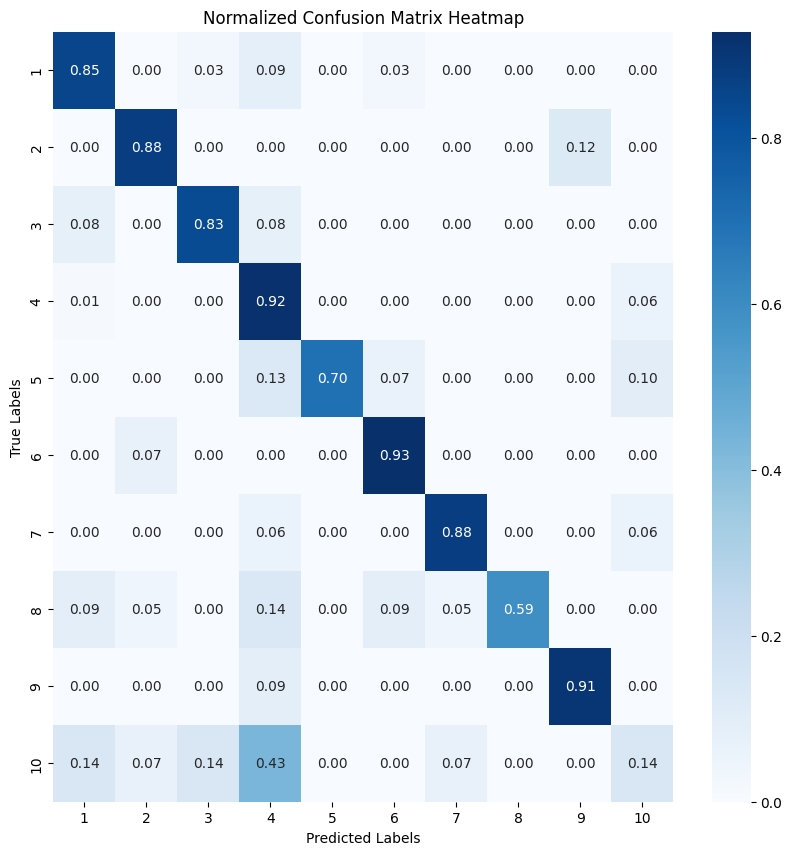

In [78]:
# Convert 'Modelo_v2' to integers

df = eval_class_v2
df['Modelo_v2'] = df['Modelo_v2'].astype(int)

# Get sorted unique labels across both columns
labels = sorted(set(df['Jose_Angelo'].unique()) | set(df['Modelo_v2'].unique()))

# Compute the confusion matrix
conf_matrix = confusion_matrix(df['Jose_Angelo'], df['Modelo_v2'], labels=labels)

# Normalize the confusion matrix (row-wise)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix Heatmap')
plt.show()

In [79]:
from sklearn.metrics import classification_report

# Print the full classification report
report = classification_report(df['Jose_Angelo'], df['Modelo_v2'], labels=labels)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           1       0.81      0.85      0.83        34
           2       0.70      0.88      0.78         8
           3       0.77      0.83      0.80        12
           4       0.87      0.92      0.90       140
           5       1.00      0.70      0.82        30
           6       0.72      0.93      0.81        14
           7       0.88      0.88      0.88        16
           8       1.00      0.59      0.74        22
           9       0.91      0.91      0.91        11
          10       0.13      0.14      0.14        14

    accuracy                           0.82       301
   macro avg       0.78      0.76      0.76       301
weighted avg       0.84      0.82      0.82       301



In [80]:
len(df.query('Modelo == 10')) / len(df)

0.12292358803986711

In [86]:
class_v2['categoria__'] = class_v2['categoria'].apply(lambda x: ast.literal_eval(x))
class_v2 = class_v2.explode('categoria__')

In [88]:
print(len(class_v2.query('categoria__ == 10')))
len(class_v2.query('categoria__ == 10')) / len(class_v2)

112


0.07339449541284404